# Intercalation

In [1]:
from pymultieis.multieis import *

In [2]:
#|hide
from IPython.display import display,Image,SVG
import numpy as np
import pandas as pd
import scipy.sparse as sps
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.facecolor'] = 'white'

This example uses a more complicated function with 11 parameters. The weighting will be the variance and we shall use the `fit_deterministic()` method. The first step is always to load the data.

In [33]:
F_intercal = torch.tensor(np.load('../../../data/intercalation_50/freq_50.npy'), dtype=torch.float64)
Z_intercal = torch.tensor(np.load('../../../data/intercalation_50/Z_50.npy'))
Zerr_intercal = torch.tensor(np.load('../../../data/intercalation_50/sigma_Z_50.npy'))


Next we define our function and other arrguments required to instantiate the `Multieis` class.

In [34]:
def intercalation(p, f):
    """
    Circuit adapted from the paper by Collins Erinmwingbovo et al.,
    DOI: 10.1002/celc.201900805
    """
    w = 2*torch.pi*f
    s = 1j*w
    Rs = p[0]
    Qh = p[1]*p[10]
    nh = p[2]
    Rad = p[3]/p[10]
    Wad = p[4]/p[10]
    Cad = p[5]*p[10]
    Rint = p[6]/p[10]
    Wint = p[7]/p[10]
    tau = p[8]
    alpha = p[9]
    Rp = p[10]
    Ct = (1/Cad)**-1
    Zad = Rad + (Wad/torch.sqrt(w) * (1-1j))
    Zint = Rint + Wint/((s*tau)**(alpha/2)) * 1/(torch.tanh((s*tau)**(alpha/2)))
    Yf = (Zad + (s*Ct)**-1)/(Zad*Zint + (Zad+Zint)*(s*Ct)**-1)
    Ydl = Qh*((s)**nh)
    Kl = torch.sqrt(Ydl + Yf)
    Z = Rs + Rp * torch.tanh(Kl)**-1 / Kl
    return torch.cat([Z.real, Z.imag], dim = 0)


In [35]:
p0_intercal = torch.tensor([1.84285135e+01, 1.71039097e-05, 6.98550706e-01,
             7.33632243e-01, 4.77681912e+02, 5.65632259e-04,
             1.34721147e+01, 1.34025052e+02, 3.93700063e+00,
             2.96283162e-01, 2.31503009e-01])

bounds_intercal = [[1e-1,  1e6], [1e-8, 1e-1], [1e-1, 1], [1e-1, 1e7], [1e-1,  1e7], \
                                      [1e-7, 1e-1], [1e-1,  1e6], [1e-1,  1e7], [1e-1,  1e2], [1.5e-1, 1.01], [1e-1,  1e7]]

In [36]:
smf_intercal100000 = torch.full((len(p0_intercal),),100000.)
smf_intercal10000 = torch.full((len(p0_intercal),),10000.)
smf_intercal1000 = torch.full((len(p0_intercal),),1000.)
smf_intercal100 = torch.full((len(p0_intercal),),100.)
smf_intercal10 = torch.full((len(p0_intercal),),10.)
smf_intercal1 = torch.full((len(p0_intercal),),1.)

In this particle example we shall use the iterative approach to gradually decrease the value of the smoothing factor until the change in the reduced chisquare is negligible.

smoothing factor = 100000

In [37]:
eis_intercal100000 = Multieis(p0_intercal, F_intercal, Z_intercal, bounds_intercal, smf_intercal100000, intercalation, weight=Zerr_intercal, immittance='impedance')
popt_intercal100000, perr_intercal100000, chisqr_intercal100000, chitot_intercal100000, AIC_intercal100000 = eis_intercal100000.fit_deterministic2()
print(chisqr_intercal100000, AIC_intercal100000)

Iteration : 1000, Loss : 5.97826e+01
Iteration : 2000, Loss : 3.81465e+01
Iteration : 3000, Loss : 3.28428e+01
Iteration : 4000, Loss : 3.23297e+01
Iteration : 5000, Loss : 3.19499e+01
Iteration : 5181, Loss : 3.18682e+01
Optimization complete
total time is 0:00:48.360729 30.587309 1853.7175


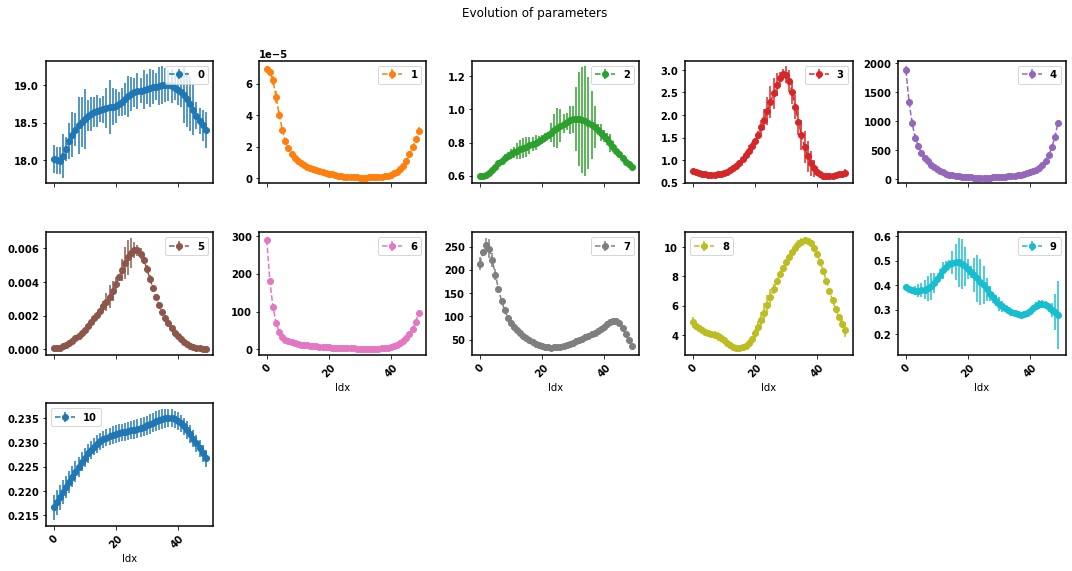

In [38]:
eis_intercal100000.plot_params(show_errorbar=True)

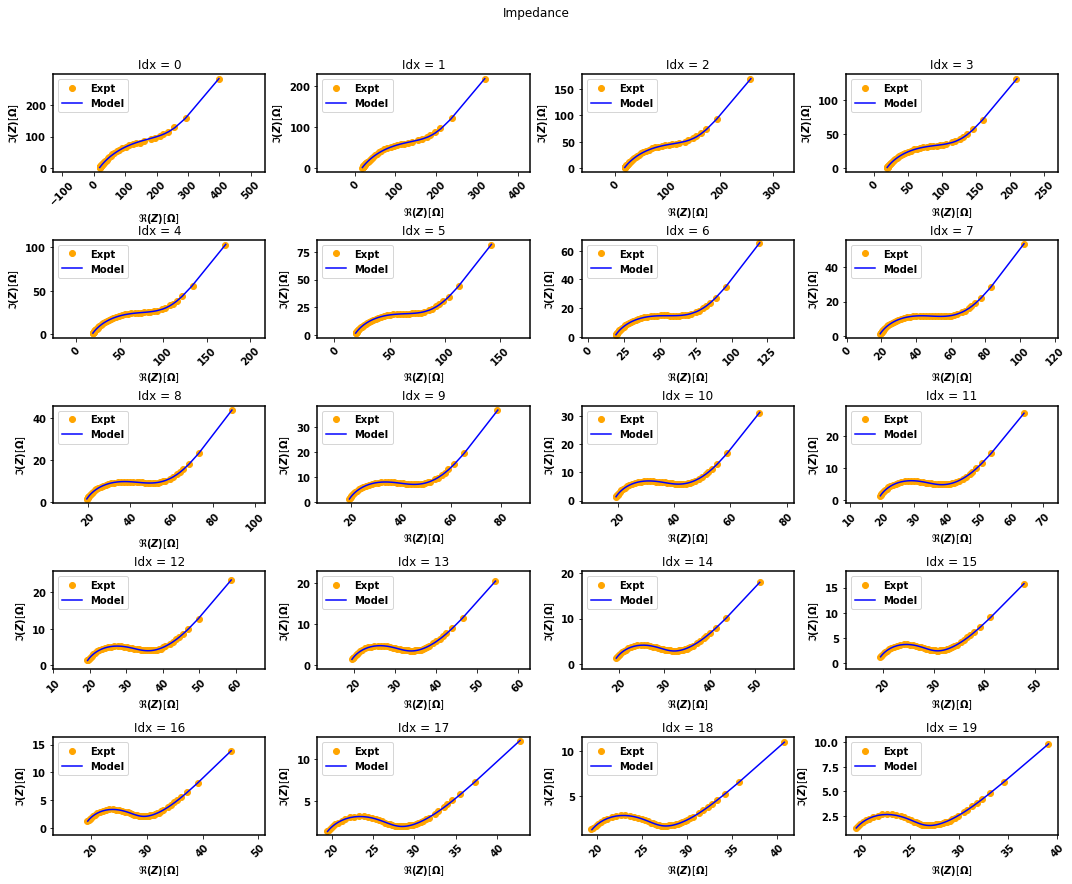

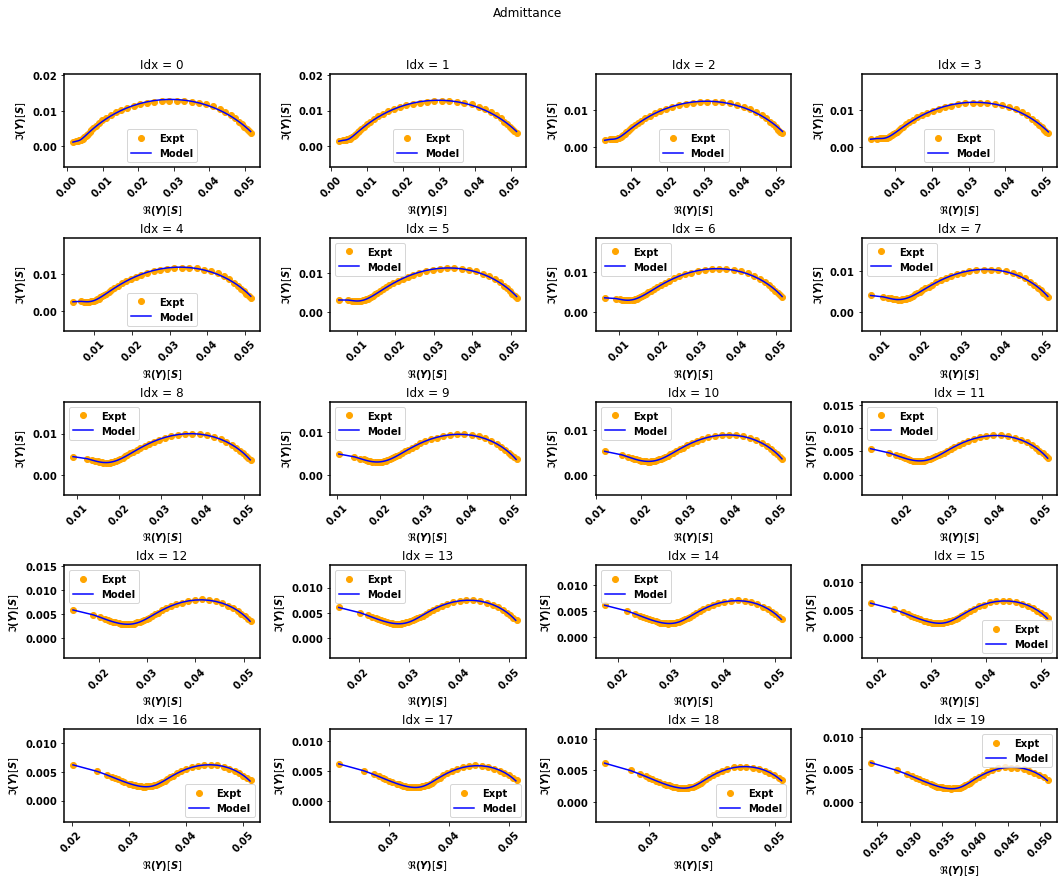

In [39]:
eis_intercal100000.plot_nyquist(steps = 10)

smoothing factor = 10000

Iteration : 1000, Loss : 2.99984e+01
Iteration : 1619, Loss : 2.98683e+01
Optimization complete
total time is 0:00:13.825177 29.367609 1757.3612


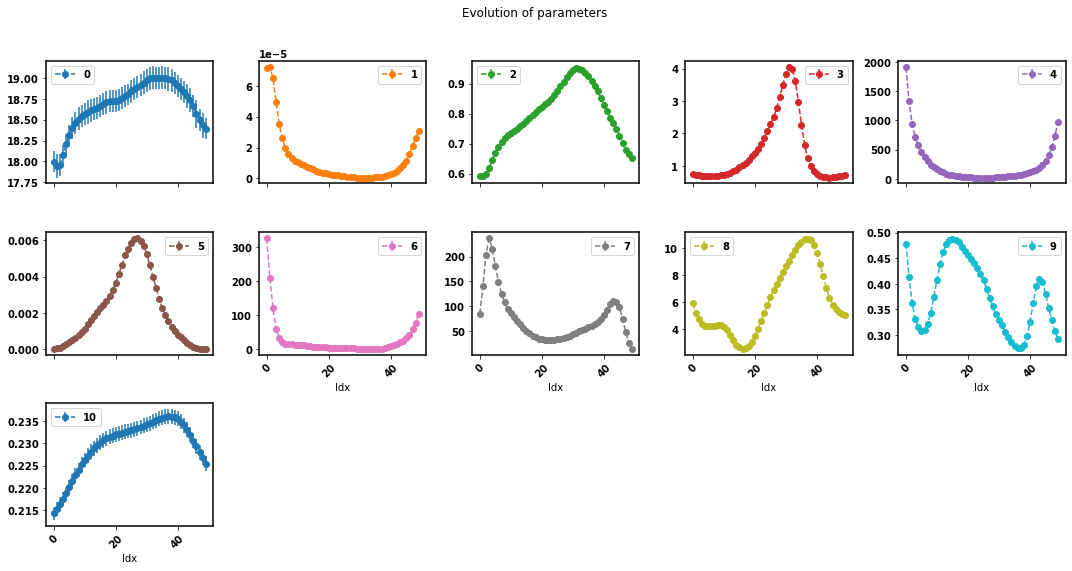

In [40]:
eis_intercal10000 = Multieis(popt_intercal100000, F_intercal, Z_intercal, bounds_intercal, smf_intercal10000, intercalation, weight=Zerr_intercal, immittance='impedance')
popt_intercal10000, perr_intercal10000, chisqr_intercal10000, chitot_intercal10000, AIC_intercal10000 = eis_intercal10000.fit_deterministic2()
print(chisqr_intercal10000, AIC_intercal10000)
eis_intercal10000.plot_params(show_errorbar=True)

smoothing factor = 1000

Iteration : 1000, Loss : 2.91007e+01
Iteration : 2000, Loss : 2.88439e+01
Iteration : 3000, Loss : 2.85228e+01
Iteration : 4000, Loss : 2.82180e+01
Iteration : 4092, Loss : 2.82103e+01
hessian inv is identity

Optimization complete
total time is 0:01:48.084532 27.763983 1630.6743


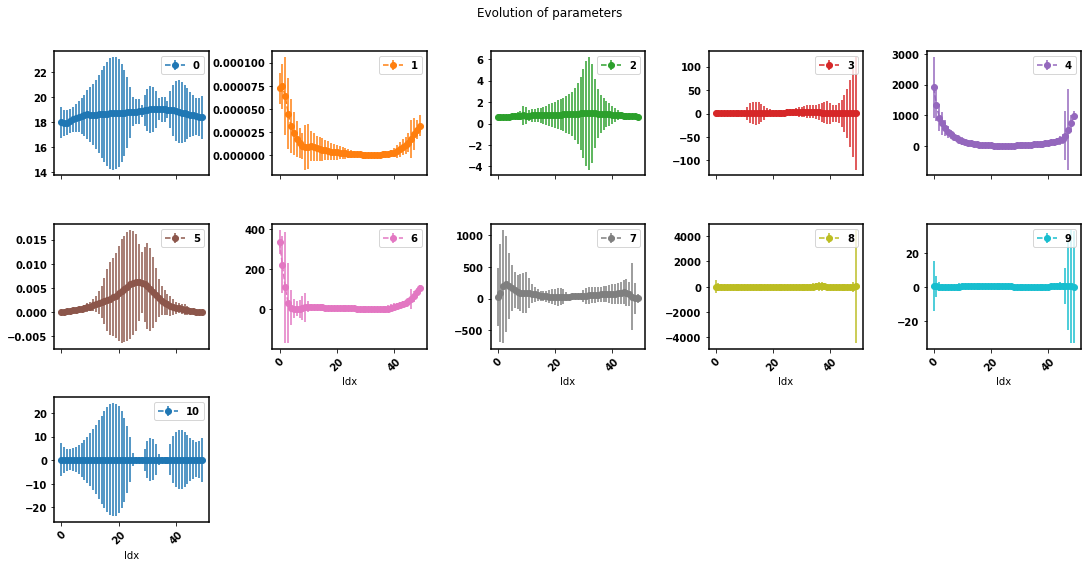

In [41]:
eis_intercal1000 = Multieis(popt_intercal10000, F_intercal, Z_intercal, bounds_intercal, smf_intercal1000, intercalation, weight=Zerr_intercal, immittance='impedance')
popt_intercal1000, perr_intercal1000, chisqr_intercal1000, chitot_intercal1000, AIC_intercal1000 = eis_intercal1000.fit_deterministic2()
print(chisqr_intercal1000, AIC_intercal1000)
eis_intercal1000.plot_params(show_errorbar=True)

smoothing factor = 100

Iteration : 17, Loss : 2.78086e+01
hessian inv is identity

Optimization complete
total time is 0:01:13.567298 27.763977 1630.6743


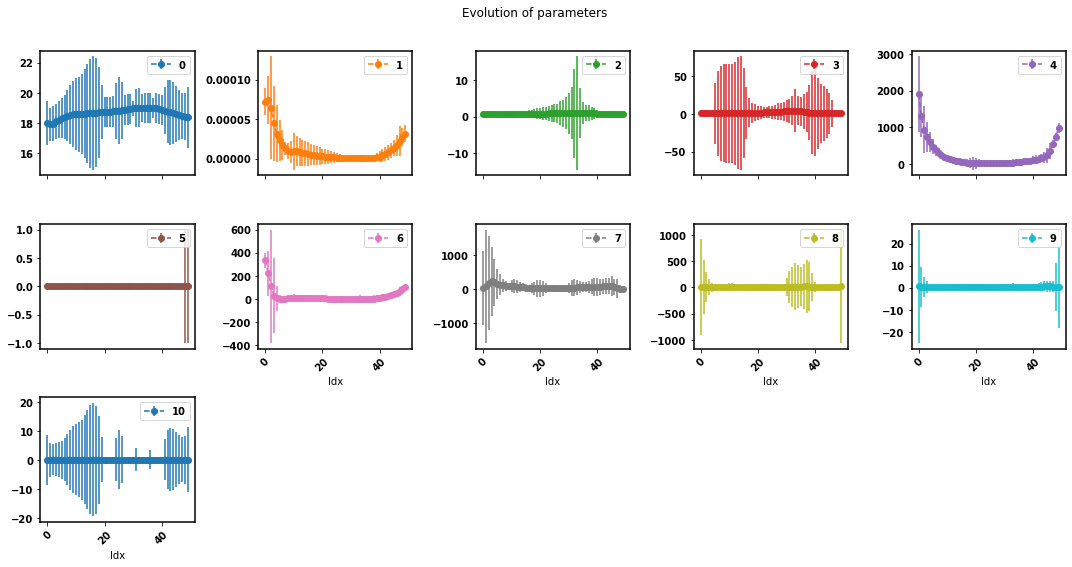

In [42]:
eis_intercal100 = Multieis(popt_intercal1000, F_intercal, Z_intercal, bounds_intercal, smf_intercal100, intercalation, weight=Zerr_intercal, immittance='impedance')
popt_intercal100, perr_intercal100, chisqr_intercal100, chitot_intercal100, AIC_intercal100 = eis_intercal100.fit_deterministic2()
print(chisqr_intercal100, AIC_intercal100)
eis_intercal100.plot_params(show_errorbar=True)

smoothing factor = 10

Iteration : 21, Loss : 2.77684e+01
Optimization complete
total time is 0:00:00.341834 27.763943 1630.6715


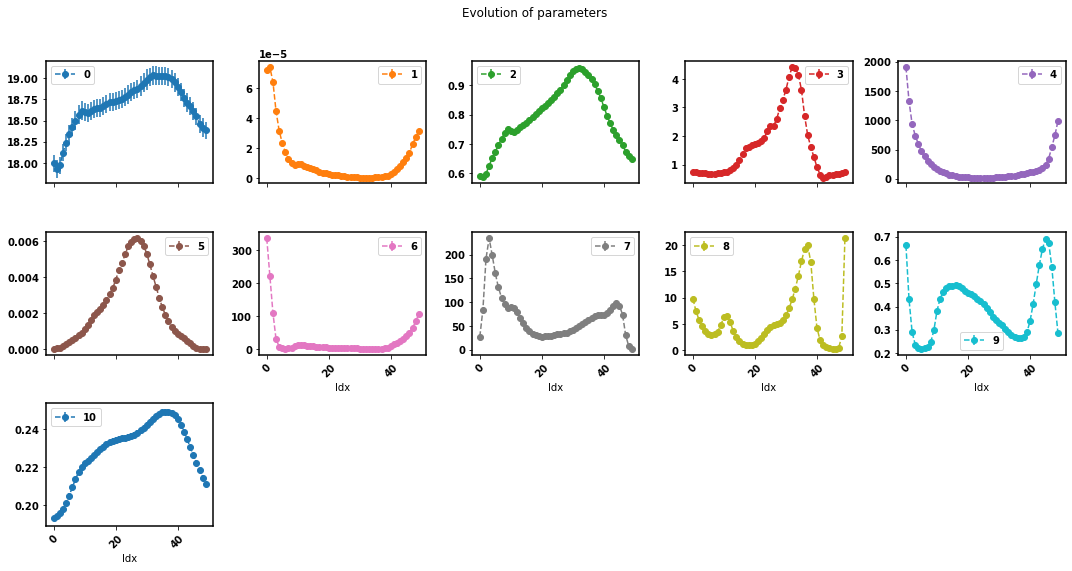

In [43]:
eis_intercal10 = Multieis(popt_intercal100, F_intercal, Z_intercal, bounds_intercal, smf_intercal10, intercalation, weight=Zerr_intercal, immittance='impedance')
popt_intercal10, perr_intercal10, chisqr_intercal10, chitot_intercal10, AIC_intercal10 = eis_intercal10.fit_deterministic2()
print(chisqr_intercal10, AIC_intercal10)
eis_intercal10.plot_params(show_errorbar=True)

smoothing factor = 1

Iteration : 21, Loss : 2.77644e+01
Optimization complete
total time is 0:00:00.243072 27.763975 1630.6741


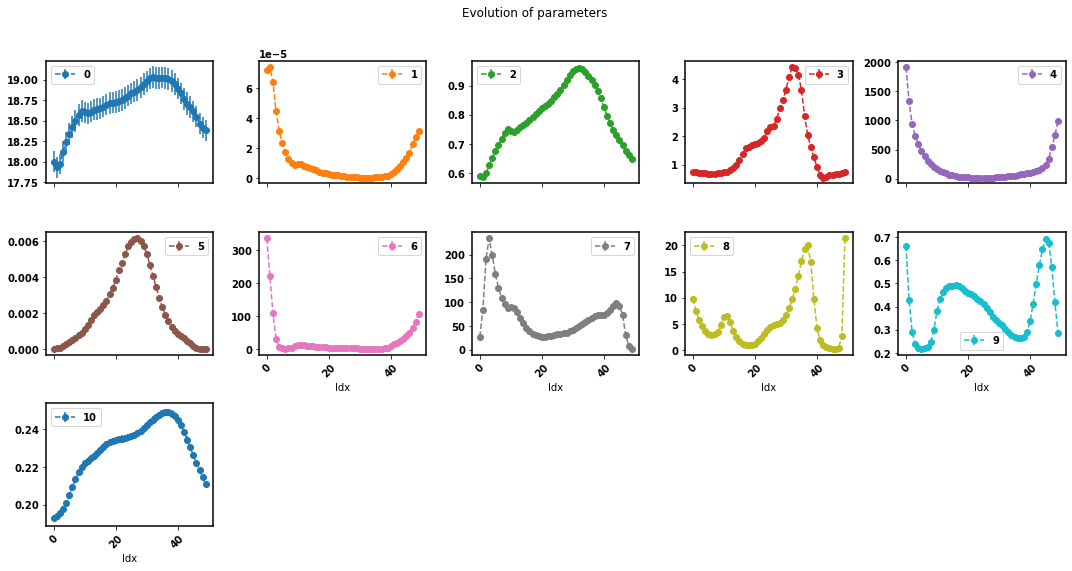

In [44]:
eis_intercal1 = Multieis(popt_intercal10, F_intercal, Z_intercal, bounds_intercal, smf_intercal1, intercalation, weight=Zerr_intercal, immittance='impedance')
popt_intercal1, perr_intercal1, chisqr_intercal1, chitot_intercal1, AIC_intercal1 = eis_intercal1.fit_deterministic2()
print(chisqr_intercal1, AIC_intercal1)
eis_intercal1.plot_params(show_errorbar=True)

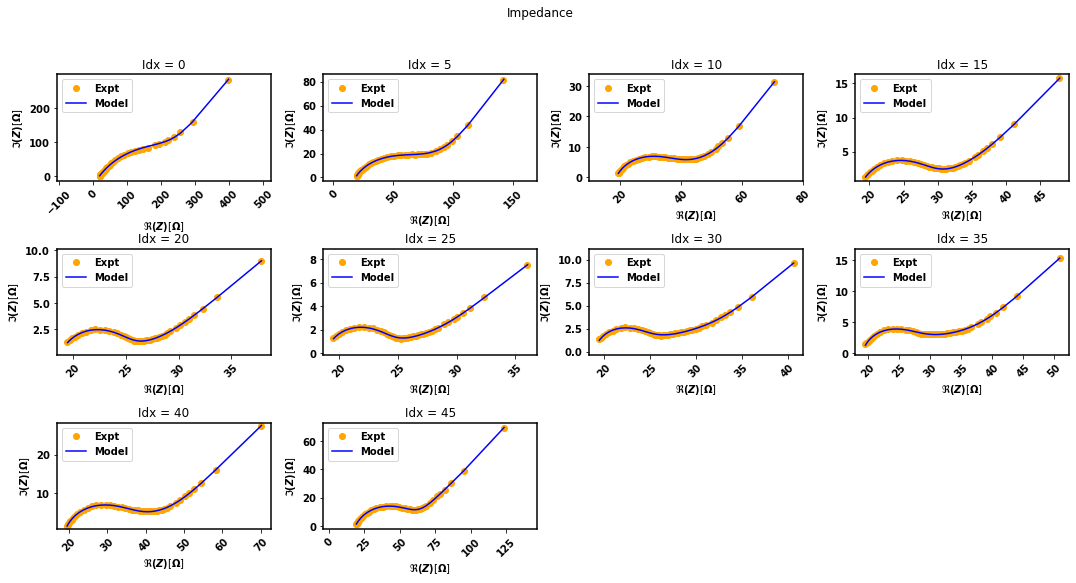

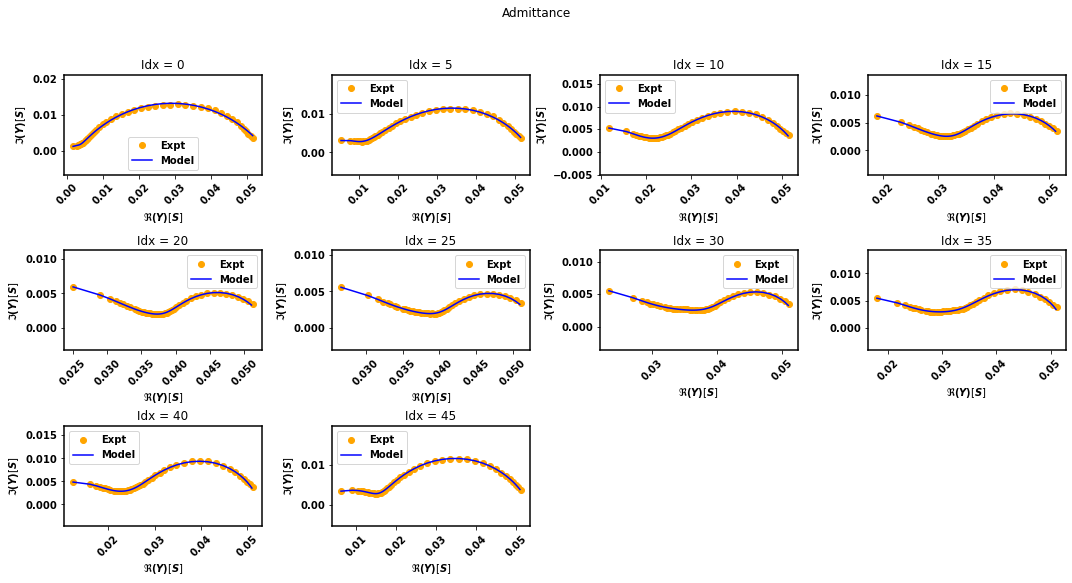

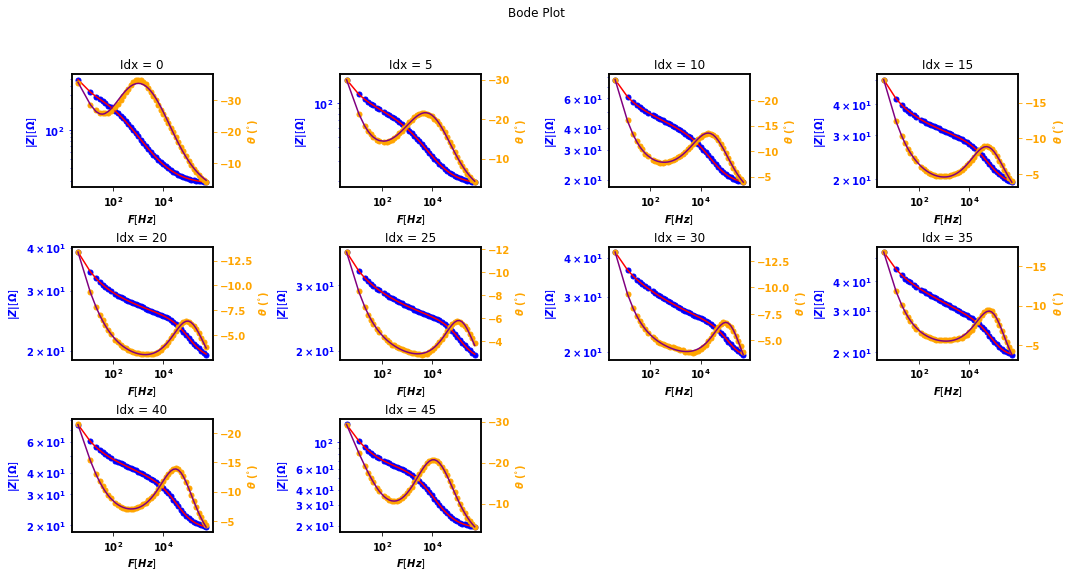

In [45]:
eis_intercal1.plot_nyquist(steps = 5)
eis_intercal1.plot_bode(steps = 5)

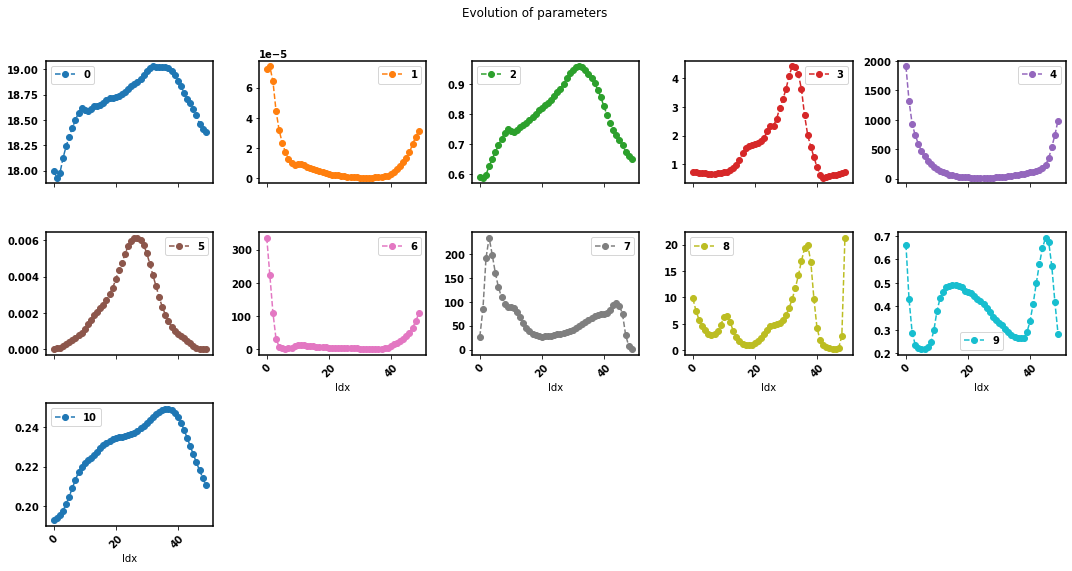

In [46]:
eis_intercal1.plot_params()

If we compare the parameters plot when the smoothing factor is set to 1.0 to when the smoothing factor is set to 100000, we see a difference in the smoothness of the parameter.

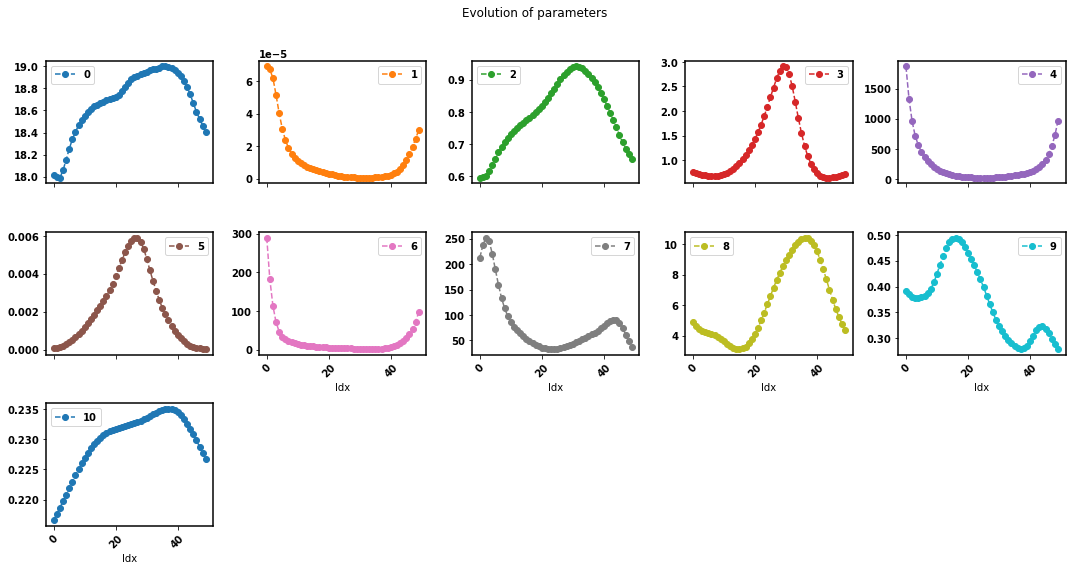

In [47]:
eis_intercal100000.plot_params()

If instead of weighting by the standard deviation, we weight by the modulus, the smoothing factor can be set to 1.0

In [48]:
eis_intercal_mod = Multieis(p0_intercal, F_intercal, Z_intercal, bounds_intercal, smf_intercal1, intercalation, weight='modulus', immittance='impedance')
popt_intercal_mod , perr_intercal_mod , chisqr_intercal_mod, chitot_intercal_mod, AIC_intercal_mod  = eis_intercal_mod.fit_deterministic()
print(chisqr_intercal_mod, AIC_intercal_mod)

Using p0
Iteration : 1000, Loss : 2.55898e-05
Iteration : 2000, Loss : 1.86040e-05
Iteration : 3000, Loss : 1.51130e-05
Iteration : 3890, Loss : 1.43415e-05
Optimization complete
total time is 0:01:14.021196 1.1063841e-05 -193.20132


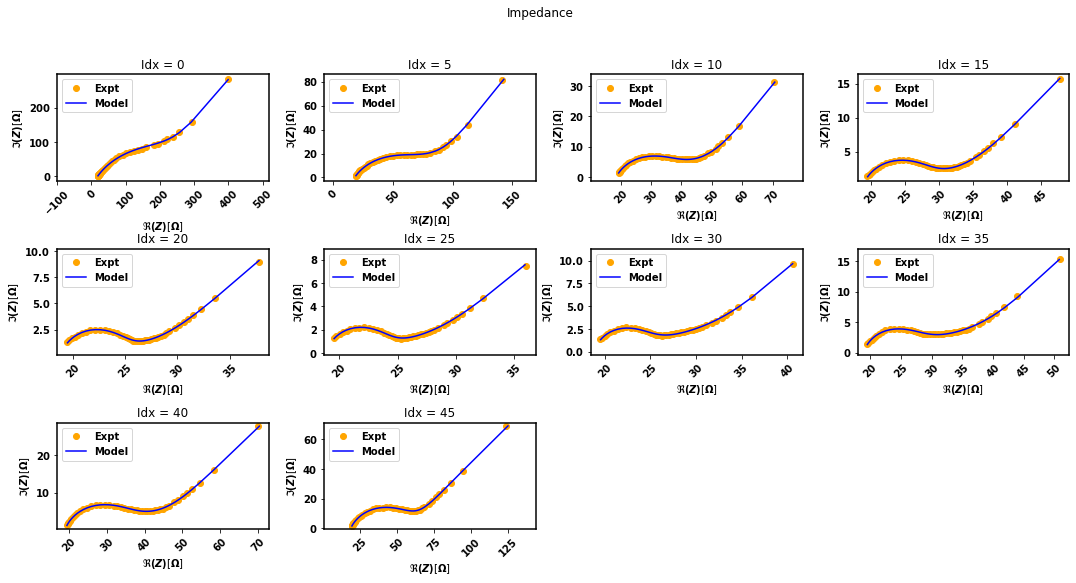

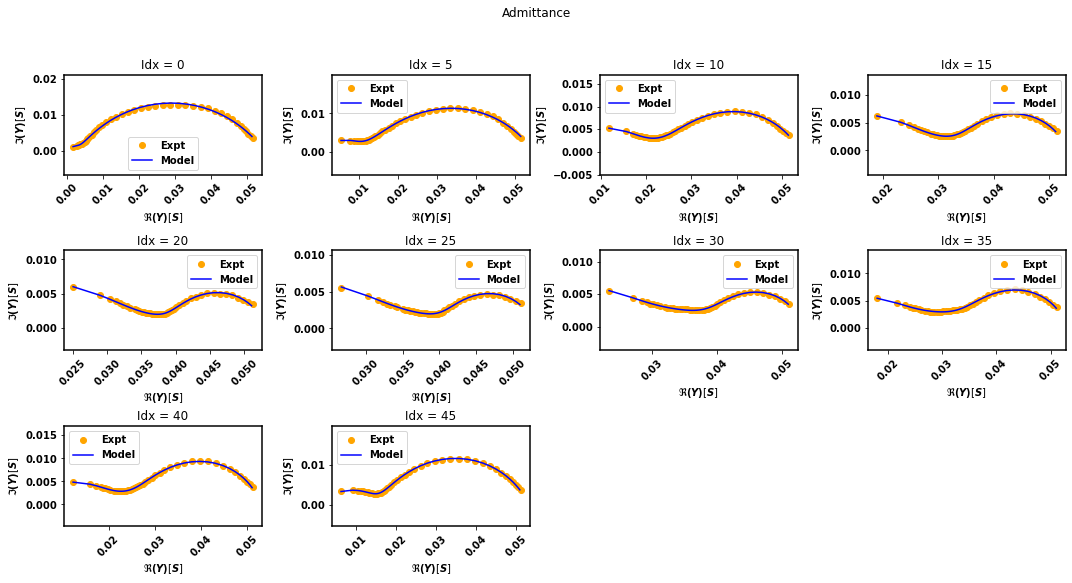

In [49]:
eis_intercal_mod.plot_nyquist(steps = 5)

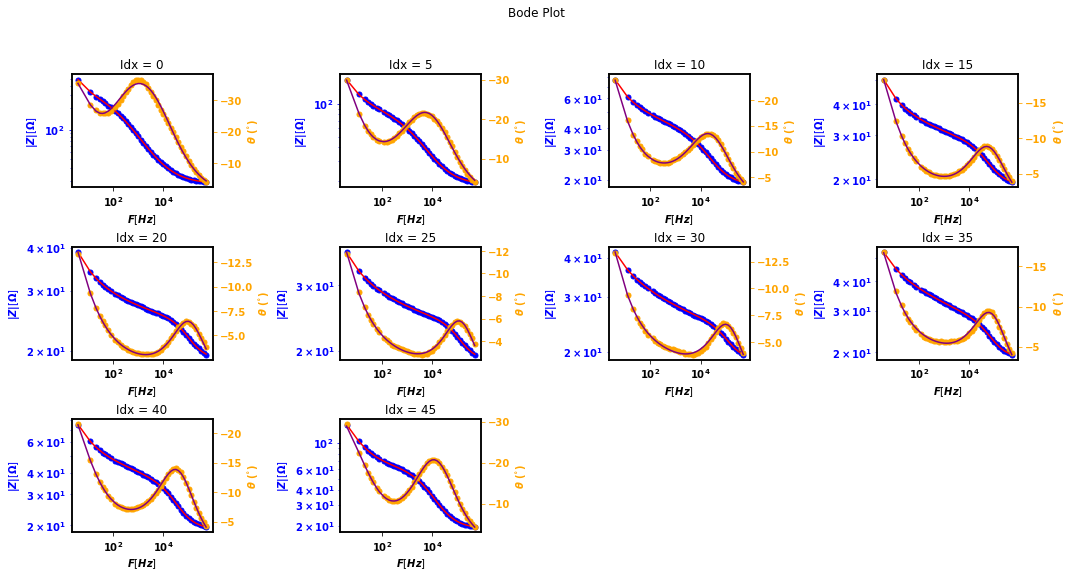

In [50]:
eis_intercal_mod.plot_bode(steps = 5)

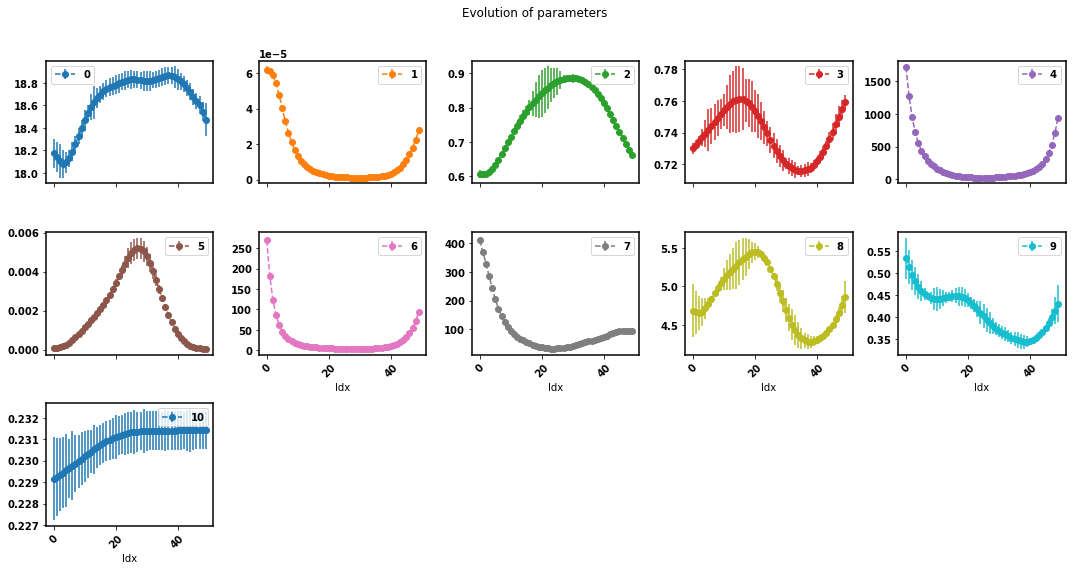

In [51]:
eis_intercal_mod.plot_params(show_errorbar = True)

In [52]:
print(popt_intercal_mod[:, 25])

tensor([1.8832e+01, 1.2839e-06, 8.7630e-01, 7.3569e-01, 2.2671e+01, 4.9477e-03,
        3.7214e+00, 3.2317e+01, 5.2327e+00, 4.0196e-01, 2.3132e-01])


In [53]:
print(perr_intercal_mod[:, 25])

tensor([8.5253e-02, 8.2171e-08, 3.9003e-02, 8.1770e-03, 2.7361e-01, 5.6473e-04,
        6.0251e-02, 1.5558e+00, 3.6494e-02, 2.7208e-02, 9.4523e-04])


We can compute the error via bootstrap MC

In [54]:
perrmc_intercal_mod = eis_intercal_mod.compute_perr_mc(n_boots = 100)

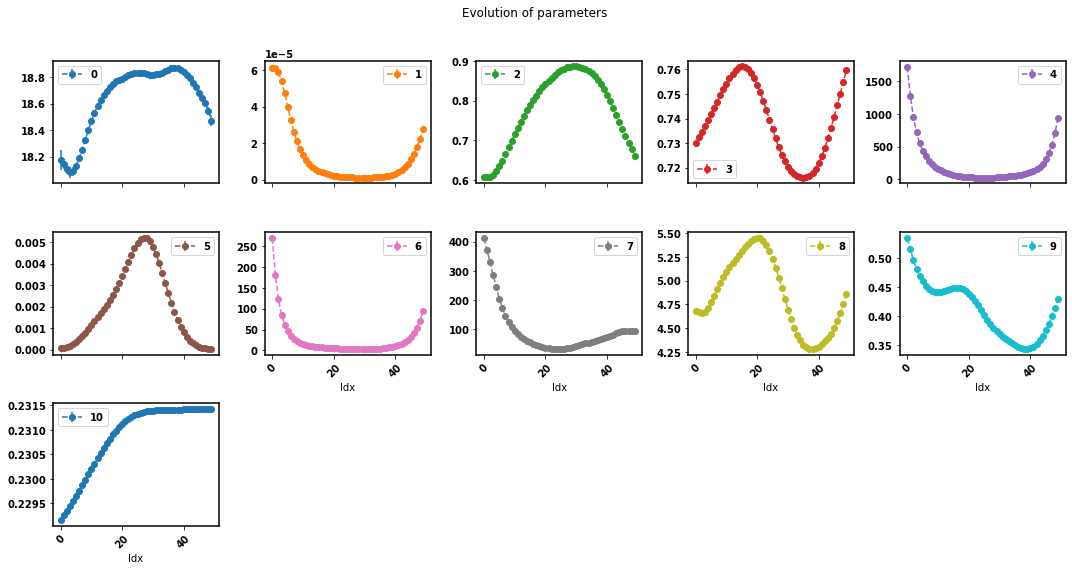

In [55]:
eis_intercal_mod.plot_params(show_errorbar = True)

There is also the possibility keep a parameter constant during optimization. In order to do this we set the smoothing factor of that parameter to `torch.inf`. In the following example we set the solution resistance Rs to inf

In [58]:
smf_intercal_const = torch.full((len(p0_intercal),),1.)
smf_intercal_const[0] = torch.inf

In [59]:
eis_intercal_const = Multieis(p0_intercal, F_intercal, Z_intercal, bounds_intercal, smf_intercal_const, intercalation, weight='modulus', immittance='impedance')
popt_intercal_const , perr_intercal_const , chisqr_intercal_const, chitot_intercal_const, AIC_intercal_const  = eis_intercal_const.fit_deterministic()
print(chisqr_intercal_const, AIC_intercal_const)

Using p0
Iteration : 1000, Loss : 2.51430e-05
Iteration : 2000, Loss : 2.08079e-05
Iteration : 2379, Loss : 2.02236e-05
Optimization complete
total time is 0:01:25.797444 1.1973546e-05 -181.68257


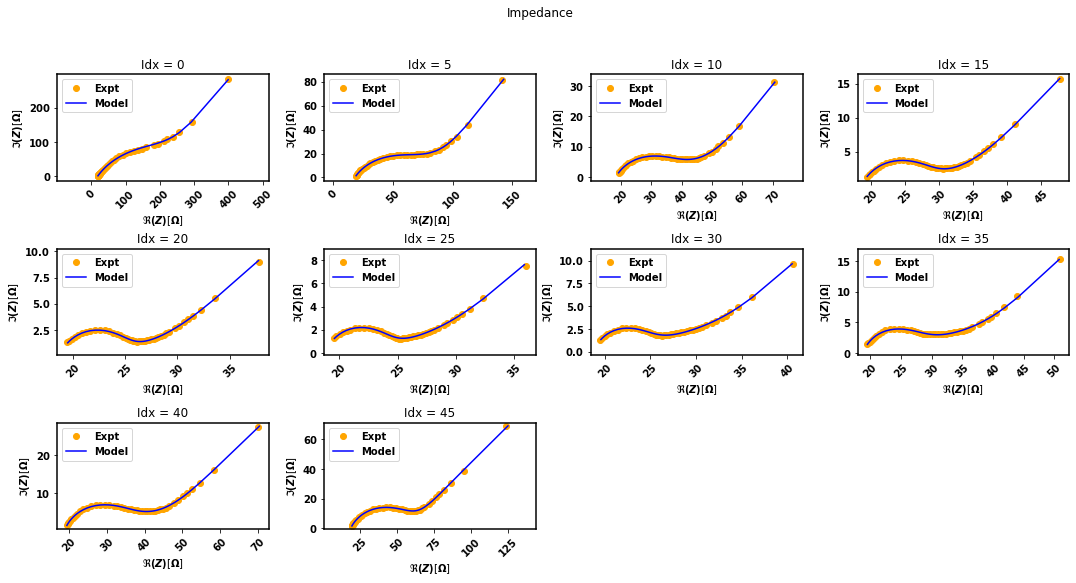

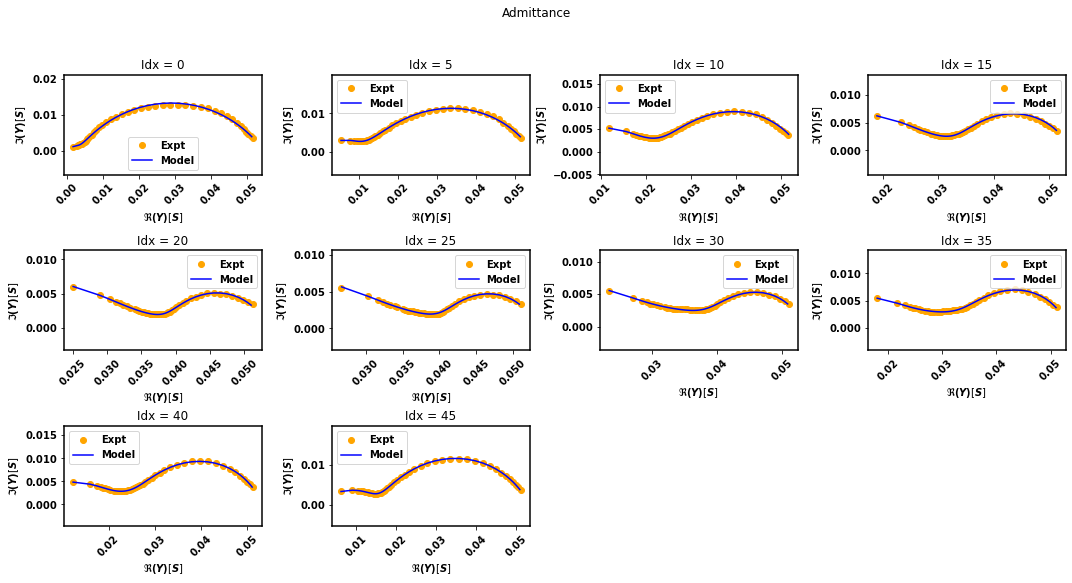

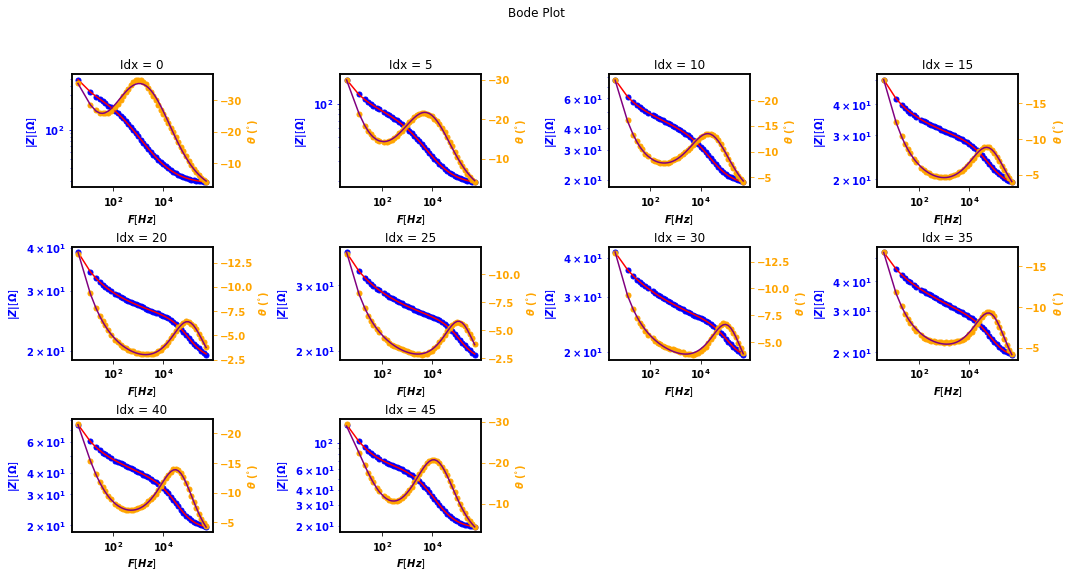

In [60]:
eis_intercal_const.plot_nyquist(steps = 10)
eis_intercal_const.plot_bode(steps = 10)

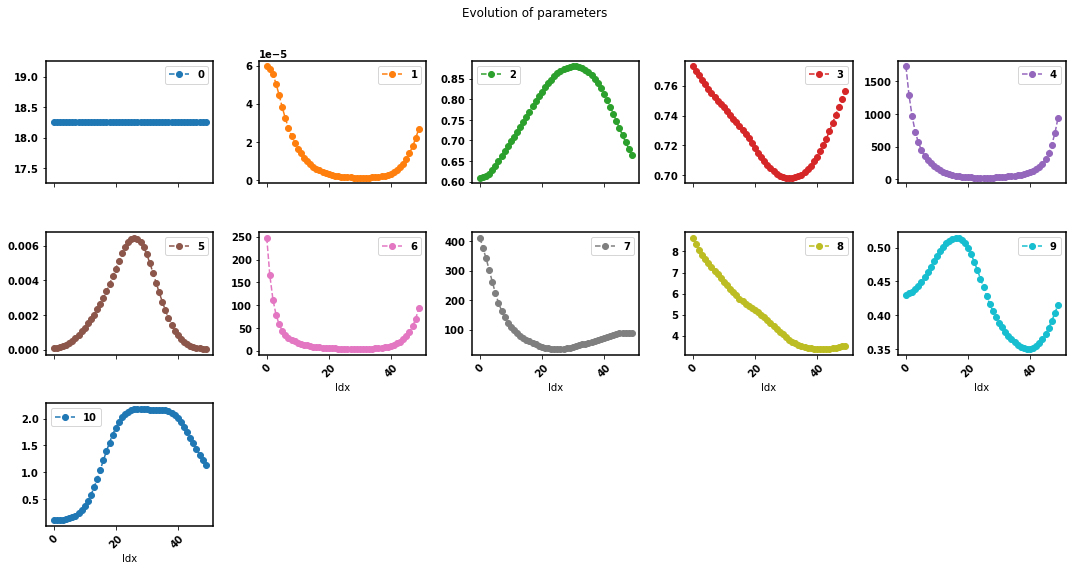

In [61]:
eis_intercal_const.plot_params()